# 모델 성능 평가를 위한 데이터셋 분리

# 데이터셋(Dataset)
- **Train 데이터셋 (훈련/학습 데이터셋)**
    - 모델을 학습시킬 때 사용할 데이터셋.
- **Validation 데이터셋 (검증 데이터셋)**
    - 모델의 성능 중간 검증을 위한 데이터셋
- **Test 데이터셋 (평가 데이터셋)**
    - 모델의 성능을 최종적으로 측정하기 위한 데이터셋
    - **Test 데이터셋은 마지막에 모델의 성능을 측정하는 용도로 한번만 사용되야 한다.**
        - 모델을 훈련하고 평가했을때 원하는 성능이 나오지 않으면 데이터나 모델 학습을 위한 설정(하이퍼파라미터)을 수정한 뒤에 다시 훈련시키고 평가를 하게 된다. 원하는 성능이 나올때 까지 설정변경->훈련->평가를 반복하게 된다. 
        - 위 사이클을 반복하게 되면 평가결과를 바탕으로 설정을 변경하게 되므로 모델이 평가할 때 사용한 데이터셋(Test set)에 모델이 맞춰서 훈련하는 것과 동일한 효과를 내게 된다.(설정을 변경하는 이유가 Test set에 대한 결과를 좋게 만들기 위해 변경하므로) 그래서 Train dataset과 Test dataset 두개의 데이터셋만 사용하게 되면 모델의 성능을 제대로 평가할 수 없게 된다. 그래서 데이터셋을 train 세트, validation 세터, test 세트로 나눠 train set 와 validation set으로 모델을 최적화 한 뒤 마지막에 test set으로 최종 평가를 한다.

# Hold Out - Data분리 방식 1
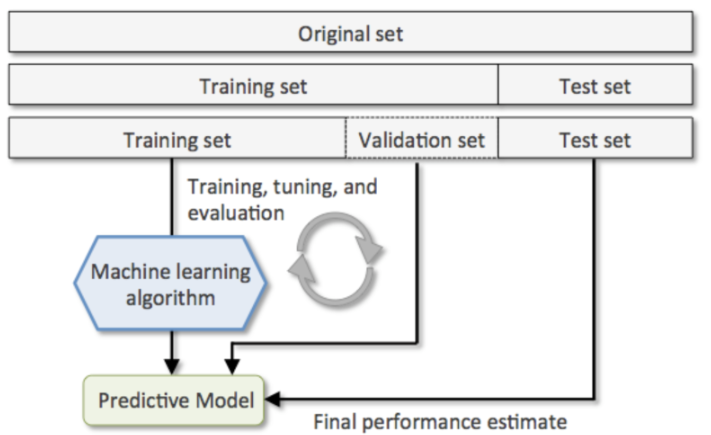

- 데이터셋을 Train set, Validation set, Test set으로 나눈다.
- sklearn.model_selection.train_test_split()  함수 사용
    - 하나의 데이터셋을 2분할 하는 함수

## Train/Test set 분리

## Train/Validation/Test set 분리

##### 모델생성, 평가

- max_depth=정수
    - 하이퍼파라미터(Hyper Parameter): 모델의 성능에 영향을 주는 파라미터 값으로 개발자가 설정하는 값.
    - 파라미터(Parameter): 머신러닝 모델의 파라미터 => 학습을 통해서 찾는 모델의 가중치값.

#####  Testset으로 최종검증

## Hold out 방식의 단점
- train/validation/test 셋이 어떻게 나눠 지냐에 따라 결과가 달라진다.
    - 데이터가 충분히 많을때는 변동성이 흡수되 괜찮으나 적을 경우 문제가 발생할 수 있다.
        - 이상치에 대한 영향을 많이 받는다.
        - 다양한 패턴을 찾을 수가 없기 때문에 새로운 데이터에 대한 예측 성능이 떨어지게 된다.
        
- **Hold out 방식은 (다양한 패턴을 가진) 데이터의 양이 많을 경우에 사용한다.**

# K-겹 교차검증 (K-Fold Cross Validation) - Data분리 방식 2
1. 데이터셋을 설정한 K 개로 나눈다.
1. K개 중 하나를 검증세트로 나머지를 훈련세트로 하여 모델을 학습시키고 평가한다. 
1. K개 모두가 한번씩 검증세트가 되도록 K번 반복하여 모델을 학습시킨 뒤 나온 평가지표들을 평균내서 모델의 성능을 평가한다.

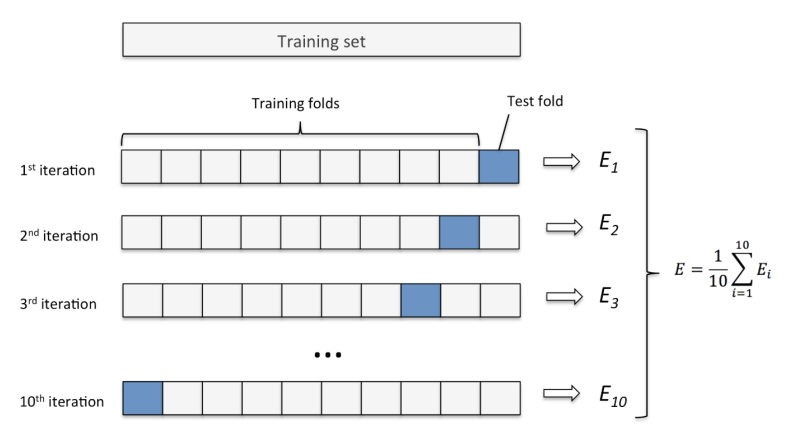

- 데이터양이 충분치 않을때 사용한다.
- 보통 Fold를 나눌때 2.5:7.5 또는 2:8 비율이 되게 하기 위해 4개 또는 5개 fold로 나눈다. 
- 종류
    - **KFold**
        - 회귀문제의 Dataset을 분리할 때 사용
    - **StratifiedKFold**
        - 분류문제의 Dataset을 분리할 때 사용

> ### Boston Housing DataSet
> 보스톤의 지역별 집값 데이터셋
> 
>  - CRIM	: 지역별 범죄 발생률
>  - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
>  - INDUS: 비상업지역 토지의 비율
>  - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
>  - NOX	: 일산화질소 농도
>  - RM	: 주택 1가구당 평균 방의 개수
>  - AGE	: 1940년 이전에 건축된 소유주택의 비율
>  - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
>  - RAD	: 고속도로까지의 접근성 지수
>  - TAX	: 10,000 달러 당 재산세율
>  - PTRATIO : 지역별 교사 한명당 학생 비율
>  - B	: 지역의 흑인 거주 비율
>  - LSTAT: 하위계층의 비율(%)
>  
>  - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)
> 

## KFold
- 지정한 개수(K)만큼 분할한다.
- Raw dataset의 순서를 유지하면서 지정한 개수로 분할한다.
- 회귀 문제일때 사용한다.
- KFold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- KFold객체.split(데이터셋)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 **index**들을 반환하는 generator 생성 

> - Generator란
>     - 연속된 값을 제공(생성)하는 객체. 연속된 값을 한번에 메모리에 저장하지 않고 필요시마다 순서대로 하나씩 제공한다.
>     - 함수형식으로 구현하며 return 대신 yield를 사용한다.

### KFold 예제

### Boston housing dataset을 KFold를 이용해 나누기

## StratifiedKold
- 나뉜 fold 들에 label들이 같은(또는 거의 같은) 비율로 구성 되도록 나눈다. 
- 각각의 클래스 별로 각각 순서대로 나눈다.
- 분류문제일 때 사용한다.
- StratifiedKold(n_splits=K)
    - 몇개의 Fold로 나눌지 지정
- StratifiedKold객체.split(X, y)
    - 데이터셋을 지정한 K개 나눴을때 train/test set에 포함될 데이터의 index들을 반환하는 generator 생성
    - input(X)와 output(y) dataset을  전달한다. 

## cross_val_score( )
- 데이터셋을 K개로 나누고 K번 반복하면서 평가하는 작업을 처리해 주는 함수
- 주요매개변수
    - estimator: 모델객체
    - X: feature
    - y: label
    - scoring: 평가지표
    - cv: 나눌 개수 (K)
        - 정수: 개수
        - KFold 타입 객체
- 반환값: array - 각 반복마다의 평가점수    